<h1><center>This Notebook is example implementation of Deep Neural Networks developed from scratch using Numpy Python.</center></h1>

In this notebook, classification task is basically done using image data. The main task is to differentiate between cat and non-cat images. The 209 colored training images and 50 colored testing images are saved in hierarchical data format i.e. with .h5 extension.

<h3>Importing necessary libraries to load and preprocess data</h3> 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

<h3>Defining Function to load data from .h5 files</h3>

In [2]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

### Loading and exploring the dimensions of data

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


### Flattening the images data

In [4]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
print("flattening converts 3 dimensions of 64,64,3 into single dimension of 12288")
print("After flattening, training data features are {} and images are {}.".format(train_x_flatten.shape[0],
                                                                                                 train_x_flatten.shape[1]))
print("After flattening, testing data features are {} and images are {}.".format(test_x_flatten.shape[0],
                                                                                                test_x_flatten.shape[1]))

flattening converts 3 dimensions of 64,64,3 into single dimension of 12288
After flattening, training data features are 12288 and images are 209.
After flattening, testing data features are 12288 and images are 50.


### Printing one of the image on screen to see if data is loaded correctly

y = 0. It's a non-cat picture.


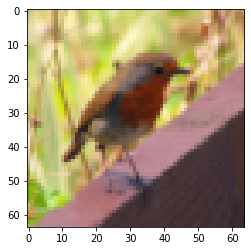

In [5]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


### Standardize data to have feature values between 0 and 1

In [6]:
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

<h1><center>Actual Implementation</center></h1>

### Import the class DNN from DeepNeuralNetworks Python file

In [7]:
from DeepNeuralNetworks import DNN

### Define the structure of DNN
Below is 4-layer model having nodes 12288, 20, 7, and 5 respectively.\
It also contains output layer having 1 node.

In [8]:
layers_dims = [12288, 20, 7, 5, 1] 

### Create an Instance of Class DNN with all necessary parameters

In [9]:
clf = DNN(layers_dims,num_iterations=1000,learning_rate=0.0075,
  weight_initialization="He",internal_activation="relu",output_activation="sigmoid",
  L2_regularization=False,lambd=0.1,dropout=False,keep_prob=0.9,
  optimization="GD", alpha=None, eps=None,
  seed=3,verbose=True,optimum_parameters=None)

### One can see the details using help command for understanding of different parameters

In [10]:
help(clf)

Help on DNN in module DeepNeuralNetworks object:

class DNN(builtins.object)
 |  DNN(layer_dims, num_iterations, learning_rate, weight_initialization, internal_activation, output_activation, L2_regularization, lambd, dropout, keep_prob, optimization='GD', alpha=0.9, eps=0.0001, seed=42, verbose=True, optimum_parameters=None)
 |  
 |  Back Propagation Neural Network Implementation using Numpy
 |  
 |  Attributes
 |  ----------
 |  layer_dims : list
 |      list containing the number of neurons/nodes for 
 |      hidden layers and ouput layer e.g. 
 |      [256,128,64,1] means 3-layer neural network having 1 output
 |  num_iterations : int
 |      total number of iterations to be run
 |  learning_rate : float
 |      the learning rate alpha to be used 
 |  weight_initialization : str
 |      type of weight initialization strategy to be used e.g. 
 |      "He" or "random"
 |  internal_activation : str
 |      type of activation function to be used for hidden layers e.g.
 |      "relu" or 

### Train the parameters by fitting the model on training data

Cost after iteration 0: 0.811602
Cost after iteration 100: 0.665508
Cost after iteration 200: 0.640047
Cost after iteration 300: 0.596324
Cost after iteration 400: 0.529296
Cost after iteration 500: 0.444691
Cost after iteration 600: 0.318397
Cost after iteration 700: 0.226152
Cost after iteration 800: 0.197870
Cost after iteration 900: 0.071531


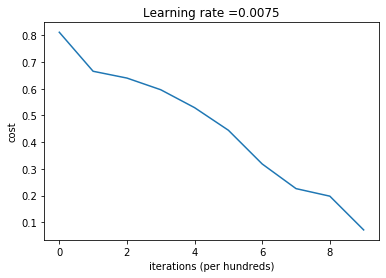

In [11]:
parameters = clf.fit(train_x,train_y)

### Predict the training and testing data using optimized parameters and evaluate the model

In [12]:
pred_train = clf.predict(train_x, parameters)
print("Training Accuracy: "  + str(np.sum((pred_train == train_y)/train_y.shape[1])))  
        
pred_test = clf.predict(test_x, parameters)
print("Testing Accuracy: "  + str(np.sum((pred_test == test_y)/test_y.shape[1])))  

Training Accuracy: 0.9952153110047844
Testing Accuracy: 0.8
